<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/LabFis4Polarizacao_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV

Prática 01: Intensidade Luminosa

obj.: Verificar a relação:  

I(r)/I_max = cos^2 (theta)

y=m.x+b

y=I(r)/I_max; x= cos^2 (theta); m_t=1 e b_t=0

Dados do Exemplo: I_max=10 w/m²; 


Grupo 01: turma 3

 theta=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0] 
 
 IR=[1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]

Grupo 02: turma 3

 theta=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0, 90.0] 
 
 IR=[1.0,0.91,0.8,0.67,0.44,0.28,0.14,0.05,0.0,0.0]


Grupo 03: turma 2

 theta=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0, 90.0] 
 
 IR=[1.0,0.88,0.84,0.68,0.54,0.41,0.23,0.1,0.02,0.0]

 Grupo 04: turma 2

 theta=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0, 90.0] 
 
 IR=[1.0,0.96,0.86,0.74,0.56,0.39,0.23,0.8,0.1,0.0]

  Grupo 05: turma 2

 theta=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0, 90.0] 
 
 IR=[1.0,0.84,0.82,0.66,0.51,0.34,0.18,0.07,0.01,0.0]

In [2]:
I_m=10

In [3]:
#ângulo

#[1.0,0.97,0.883,0.750,0.587,0.413,0.250,0.117,0.030] 
ang=[0,10,20,30,40,50,60,70,80,90]
 


In [4]:
#Intensidades Relativas:
I=[10.0,8.4,8.2,6.6,5.1,3.4,1.8,0.7,0.1,0.0] #g5
#I=[10.0,9.6,8.6,7.4,5.6,3.9,2.3,0.8,0.1,0.0] #g4
#I=[10.0,8.8,8.4,6.8,5.4,4.1,2.3,1.0,0.2,0.0] #g3
#I =[10.0,9.1,8.0,6.1,4.4,2.8,1.4,0.5,0.0,0.0] #g2

In [5]:
x=(np.cos(np.deg2rad(ang))*np.cos(np.deg2rad(ang)))
print(x)
N_medidas = len(x)
print ( "Número de medidas: {}".format( N_medidas ) )
     


[1.00000000e+00 9.69846310e-01 8.83022222e-01 7.50000000e-01
 5.86824089e-01 4.13175911e-01 2.50000000e-01 1.16977778e-01
 3.01536896e-02 3.74939946e-33]
Número de medidas: 10


In [6]:
y=np.divide(I,I_m)
print(y)

[1.   0.84 0.82 0.66 0.51 0.34 0.18 0.07 0.01 0.  ]


In [7]:
media_X = x.mean()
media_X2 = (x**2).mean( )
var_X_populacional = ( x ** 2 ).mean() - ( media_X ** 2 )
dp_X_populacional = np.sqrt( var_X_populacional )
print ( "Média (cm): {}".format( media_X ) )
print ( "Média quadrados(cm²): {}".format( media_X2 ) )
print ( "Variância (cm²): {}".format( var_X_populacional ) )
print ( "Desvio padrão (cm): {}".format( dp_X_populacional ) )
     


Média (cm): 0.5
Média quadrados(cm²): 0.3875
Variância (cm²): 0.1375
Desvio padrão (cm): 0.37080992435478316


In [8]:
media_Y = y.mean()
media_Y2 = ( y** 2 ).mean()
var_Y_populacional = ( y ** 2 ).mean() - ( media_Y ** 2 )
dp_Y_populacional = np.sqrt( var_Y_populacional )
print ( "Média : {}".format( media_Y ) )
print ( "Média quadrados: {}".format( media_Y2 ) )
print ( "Variância : {}".format( var_Y_populacional ) )
print ( "Desvio padrão : {}".format( dp_Y_populacional ) )

Média : 0.44299999999999995
Média quadrados: 0.32266999999999996
Variância : 0.126421
Desvio padrão : 0.35555730902345406


In [9]:
x_X_y = ( x * y ).mean()
cov_populacional = x_X_y - ( media_X * media_Y )
coeficiente_correlacao = cov_populacional / ( dp_X_populacional * dp_Y_populacional )
print ( "Covariância (logr × logIr): {}".format( cov_populacional ) )
print ( "Coeficiente de correlação: {}".format( coeficiente_correlacao ) )
     

Covariância (logr × logIr): 0.13119991988974583
Coeficiente de correlação: 0.9951134818496463


Coeficientes:


In [10]:
coeficiente_m = cov_populacional / var_X_populacional
print ( "Coeficiente m (cm): {}".format( coeficiente_m ) )


Coeficiente m (cm): 0.9541812355617878


In [11]:

coeficiente_b = media_Y - coeficiente_m * media_X # cm
print ( "Coeficiente b (cm): {}".format( coeficiente_b ) )

Coeficiente b (cm): -0.03409061778089395


Incertezas:

In [12]:
arr_desvios_ajuste = ( y - ( coeficiente_m * x + coeficiente_b ) )
arr_desvios_ajuste

array([ 0.07990938, -0.05131853,  0.01152738, -0.02154531, -0.01584592,
       -0.02015408, -0.02445469, -0.00752738,  0.01531853,  0.03409062])

In [13]:
print ( arr_desvios_ajuste ** 2 )
print ( "Soma quadrado desvios (cm): {}".format( ( arr_desvios_ajuste ** 2 ).sum() ) )
     


[6.38550937e-03 2.63359183e-03 1.32880568e-04 4.64200335e-04
 2.51093065e-04 4.06187087e-04 5.98031917e-04 5.66615006e-05
 2.34657453e-04 1.16217022e-03]
Soma quadrado desvios (cm): 0.012324983339948293


In [14]:
ep_y_1 = np.sqrt( ( arr_desvios_ajuste ** 2 ).sum() / ( N_medidas - 2 ) )
print ( "epsilon_y = {}".format( ep_y_1 ) )
     


epsilon_y = 0.039250769642053346


In [15]:
ep_y_2 = dp_Y_populacional * np.sqrt( ( N_medidas / ( N_medidas - 2 ) ) * ( 1. - coeficiente_correlacao ** 2 ) )
print ( "epsilon_y = {}".format( ep_y_2 ) )

epsilon_y = 0.039250769642052305


In [16]:
ep_y = ep_y_2
sigma_m = ep_y / ( dp_X_populacional * np.sqrt( N_medidas ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( sigma_m ) )


Incerteza padrão coeficiente m (cm): 0.033473168820778394


In [17]:
sigma_b = sigma_m * np.sqrt( media_X2 )
print ( "Incerteza padrão coeficiente b (cm): {}".format( sigma_b ) )

Incerteza padrão coeficiente b (cm): 0.020836879552260892


Estimativas para os coeficientes:

In [18]:
print ( "m = {:.2f} ± {:.2f} (cm)".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ) )

m = 0.95 ± 0.03 (cm)


In [19]:
print ( "b = {} ± {} (cm)".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ) )

b = -0.03 ± 0.02 (cm)


Text(0.4, 0.85, '$b = -0.03 \\pm 0.02\\,$')

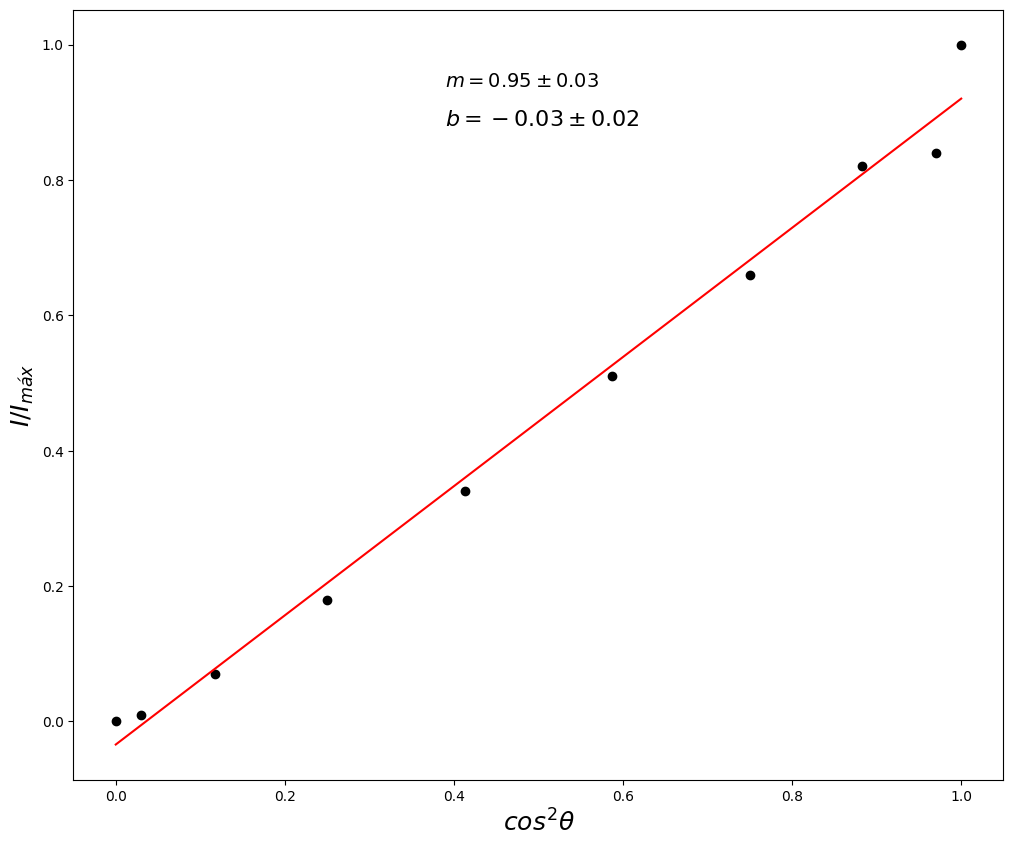

In [20]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( coeficiente_m * x + coeficiente_b ), '-r' )
plt.xlabel( r"$cos^{2}\theta $", fontsize=18)
plt.ylabel( r"$I/I_{máx}$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}\,$".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ),
          fontsize=14, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,$".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

Usando um pacote:

In [21]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[-0.03409062  0.95418124] [[ 0.00043418 -0.00056023]
 [-0.00056023  0.00112045]]


In [22]:
print ( "Coeficiente m (cm): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (cm)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m (cm): 0.9541812369063967
Incerteza padrão coeficiente m (cm): 0.03347316946216335
a = 0.95 ± 0.03 (cm)


In [23]:
print ( "Coeficiente b (cm): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (cm): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (cm)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (cm): -0.03409061797456753
Incerteza padrão coeficiente b (cm): 0.020836879149301726
-0.03 ± 0.02 (cm)


Text(0.4, 0.85, '$b = -0.03 \\pm 0.02\\,$')

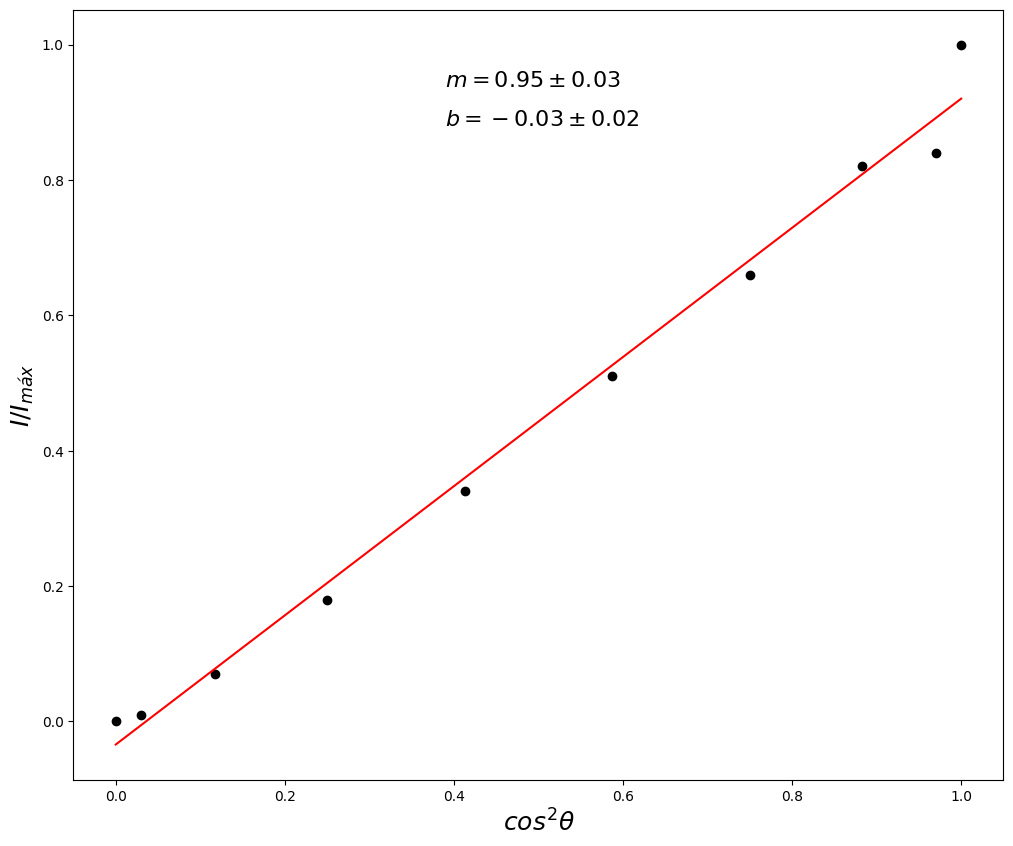

In [24]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-r' )
plt.xlabel( r"$cos^{2}\theta $", fontsize=18)
plt.ylabel( r"$I/I_{máx}$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )